In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import re
import nltk
import pandas as pd


news_tfidf_lem = pd.read_csv('title_tfidf_lem.csv')
news_countvec_lem = pd.read_csv('title_countvec_lem.csv')

reddit_tfidf_lem = pd.read_csv('reddit_tfidf_lem.csv')
reddit_countvec_lem = pd.read_csv('reddit_countvec_lem.csv')

medium_countvec_lem = pd.read_csv('medium_countvec_lem_title.csv')
medium_tfidf_lem = pd.read_csv('medium_tfidf_lem_title.csv')

news_data = pd.read_csv('news_lem.csv')
reddit_data = pd.read_csv('reddit_lem.csv')
medium_data = pd.read_csv('medium_lem.csv')

In [2]:
# Function to categorize sentiment based on polarity score
def categorize_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and categorization
news_data['Label'] = news_data['title_lem'].apply(categorize_sentiment)
reddit_data['Label']=reddit_data['comments_lem'].apply(categorize_sentiment)
medium_data['Label']=medium_data['title_lem'].apply(categorize_sentiment)

news_tfidf_lem['Label'] = news_data['Label']
news_countvec_lem['Label'] = news_data['Label']
reddit_tfidf_lem['Label'] = reddit_data['Label']
reddit_countvec_lem['Label'] = reddit_data['Label']
medium_tfidf_lem['Label'] = medium_data['Label']
medium_countvec_lem['Label'] = medium_data['Label']

In [4]:
final_countvec_lem = pd.concat([news_countvec_lem, reddit_countvec_lem, medium_countvec_lem])
final_countvec_lem = final_countvec_lem.fillna(0)

final_tfidf_lem = pd.concat([news_tfidf_lem, reddit_tfidf_lem, medium_tfidf_lem])
final_tfidf_lem = final_tfidf_lem.fillna(0)

In [20]:
final_tfidf_lem

,ai,airdrop,amid,asset,base,best,billion,bitcoin,bitcoins,blockchain,...,staking,stepbystep,strategy,testnet,think,tutorial,unveiling,update,using,work
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346565,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,0.592834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
267,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575410,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
268,0.0,0.296400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.4491,0.0,0.0,0.0,0.0
269,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0


In [21]:
final_countvec_lem

,ai,airdrop,amid,asset,base,best,billion,bitcoin,bitcoins,blockchain,...,staking,stepbystep,strategy,testnet,think,tutorial,unveiling,update,using,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_countvec_lem, test_countvec_lem = train_test_split(final_countvec_lem, test_size=0.3)
train_tfidf_lem, test_tfidf_lem = train_test_split(final_tfidf_lem, test_size=0.3)

In [17]:
train_countvec_lem

,ai,airdrop,amid,asset,base,best,billion,bitcoin,bitcoins,blockchain,...,staking,stepbystep,strategy,testnet,think,tutorial,unveiling,update,using,work
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,4.0,0.0,2.0,0.0,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
test_countvec_lem

,ai,airdrop,amid,asset,base,best,billion,bitcoin,bitcoins,blockchain,...,staking,stepbystep,strategy,testnet,think,tutorial,unveiling,update,using,work
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_labels_countvec_lem = test_countvec_lem['Label']
test_countvec_lem = test_countvec_lem.drop(['Label'], axis=1)

train_labels_countvec_lem = train_countvec_lem['Label']
train_countvec_lem = train_countvec_lem.drop(['Label'], axis=1)


test_labels_tfidf_lem = test_tfidf_lem['Label']
test_tfidf_lem = test_tfidf_lem.drop(['Label'], axis=1)

train_labels_tfidf_lem = train_tfidf_lem['Label']
train_tfidf_lem = train_tfidf_lem.drop(['Label'], axis=1)

In [7]:
MyModelNB_countvec_lem = MultinomialNB()
MyModelNB_tfidf_lem = MultinomialNB()

In [8]:
MyModelNB_countvec_lem.fit(train_countvec_lem, train_labels_countvec_lem)
MyModelNB_tfidf_lem.fit(train_tfidf_lem, train_labels_tfidf_lem)

MultinomialNB()

In [9]:
Prediction_countvec_lem = MyModelNB_countvec_lem.predict(test_countvec_lem)
Prediction_tfidf_lem = MyModelNB_tfidf_lem.predict(test_tfidf_lem)

In [10]:
def print_evaluation(predicted, actual, model):
    print(f"\nThe predictions from {model} are:")
    print(predicted)
    print("\nThe actual labels are:")
    print(actual)
    cnf_matrix = confusion_matrix(actual, predicted)
    print("\nThe confusion matrix is:")
    print(cnf_matrix)

print_evaluation(Prediction_countvec_lem, test_labels_countvec_lem, "COUNTVEC with Lemming Model")
print_evaluation(Prediction_tfidf_lem, test_labels_tfidf_lem, "TF-IDF with Lemming Model")


The predictions from COUNTVEC with Lemming Model are:
['neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'positive' 'positive' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'positive' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'positive'
 'neutral' 'neutral' 'negative' 'neutral' 'neutral' 'neutral' 'positive'
 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'negative' 'positive'
 'positive' 'positive' 'positive' 'neutral' 'neutral' 'neutral' 'negative'
 'positive' 'positive' 'neutral' 'neutral' 'positive' 'neutral' 'positi

In [11]:
print("\nPrediction probabilities for the COUNTVEC with Lemming Model:")
print(np.round(MyModelNB_countvec_lem.predict_proba(test_countvec_lem), 2))

print("\nPrediction probabilities for the TF-IDF with Lemming Model:")
print(np.round(MyModelNB_tfidf_lem.predict_proba(test_tfidf_lem), 2))


Prediction probabilities for the COUNTVEC with Lemming Model:
[[0.   1.   0.  ]
 [0.   0.99 0.01]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.01]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.01 0.98 0.01]
 [0.   1.   0.  ]
 [0.   0.99 0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.  ]
 [0.09 0.48 0.43]
 [0.09 0.48 0.43]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.01 0.98 0.  ]
 [0.09 0.48 0.43]
 [0.   0.   1.  ]
 [0.09 0.48 0.43]
 [0.09 0.48 0.43]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.09 0.48 0.43]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.04 0.72 0.24]
 [0.   0.   1.  ]
 [0.01 0.91 0.08]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.01]
 [1.   0.   0.  ]
 

In [12]:
DTModel_countvec_lem = DecisionTreeClassifier()
DTModel_tfidf_lem = DecisionTreeClassifier()

DTModel_countvec_lem.fit(train_countvec_lem, train_labels_countvec_lem)
DTModel_tfidf_lem.fit(train_tfidf_lem, train_labels_tfidf_lem)

Prediction_countvec_lem_DT = DTModel_countvec_lem.predict(test_countvec_lem)
Prediction_tfidf_lem_DT = DTModel_tfidf_lem.predict(test_tfidf_lem)

print_evaluation(Prediction_countvec_lem_DT, test_labels_countvec_lem, "Decision Tree COUNTVEC with Lemmatization")
print_evaluation(Prediction_tfidf_lem_DT, test_labels_tfidf_lem, "Decision Tree TF-IDF with Lemmatization")


print("\nClass probabilities for the Decision Tree COUNTVEC with Lemmatization Model:")
print(np.round(DTModel_countvec_lem.predict_proba(test_countvec_lem), 2))

print("\nClass probabilities for the Decision Tree TF-IDF with Lemmatization Model:")
print(np.round(DTModel_tfidf_lem.predict_proba(test_tfidf_lem), 2))


The predictions from Decision Tree COUNTVEC with Lemmatization are:
['positive' 'neutral' 'positive' 'neutral' 'neutral' 'positive' 'neutral'
 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'positive'
 'neutral' 'positive' 'positive' 'negative' 'negative' 'positive'
 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'positive' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'negative' 'neutral' 'positive'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'positive' 'positive' 'positive' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'negative' 'negative' 'positive' 'positive' 'positive'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'neutral' 'neutral' 'positive' 'positive' 'positive' 'neutral' 'n

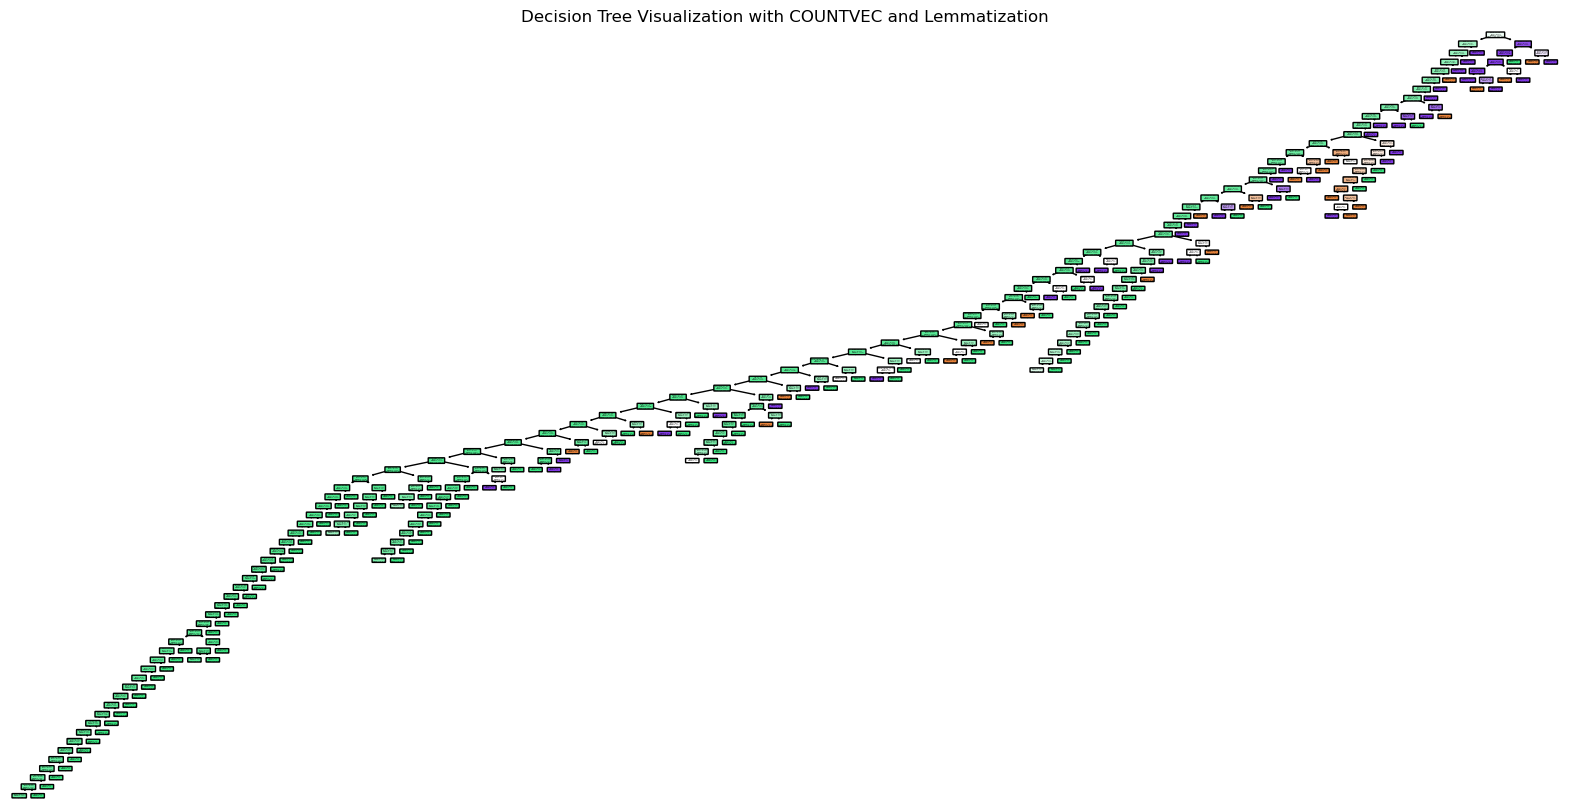

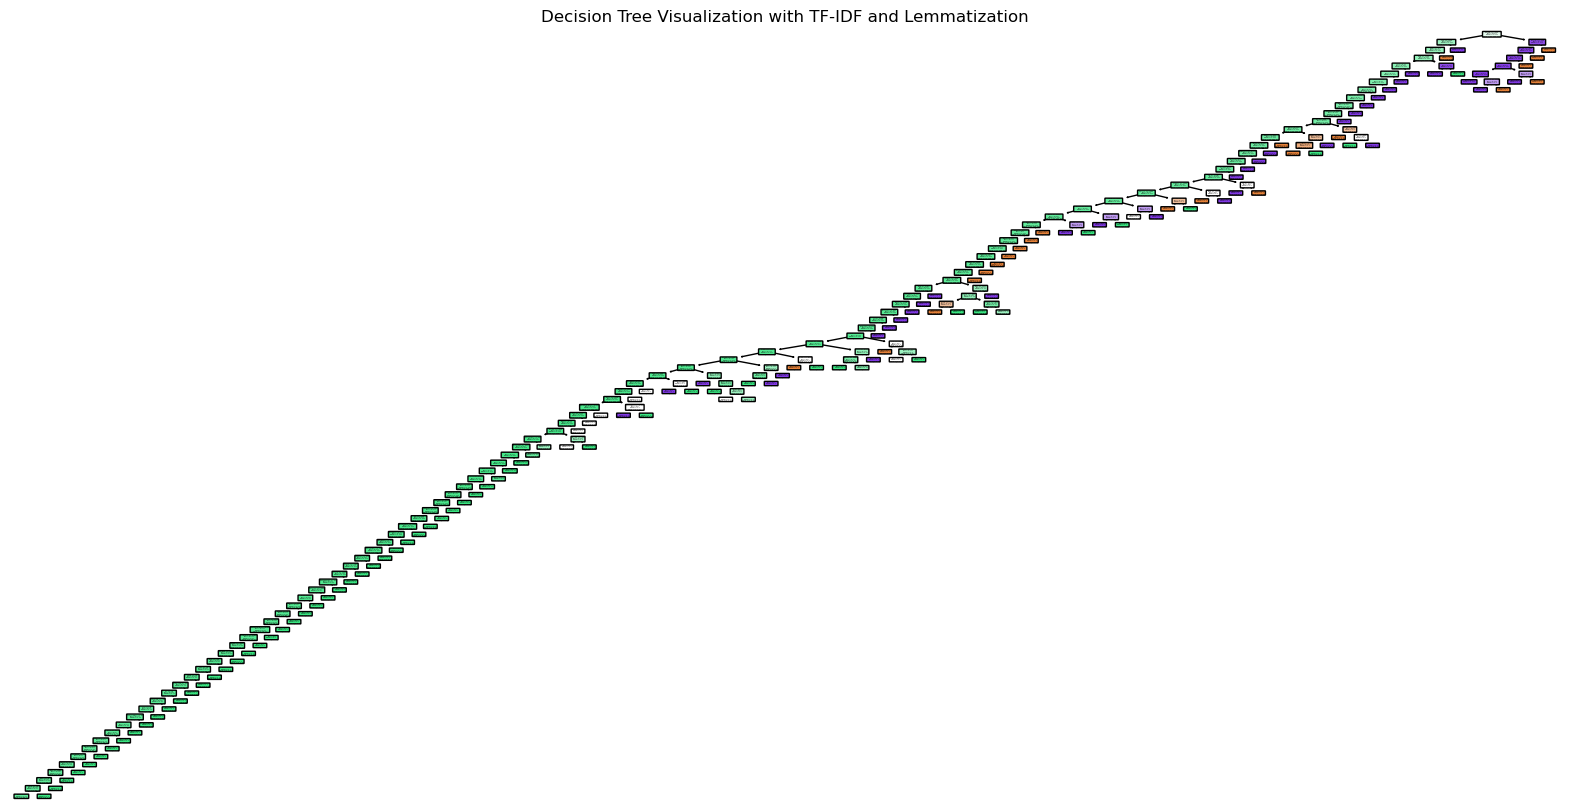

In [25]:
# Visualizing Decision Tree using COUNTVEC with Lemmatization
plt.figure(figsize=(20,10))
plot_tree(DTModel_countvec_lem, filled=True, feature_names=feature_names_countvec, rounded=True)
plt.title("Decision Tree Visualization with COUNTVEC and Lemmatization")
plt.show()

# Visualizing Decision Tree using TF-IDF with Lemmatization
plt.figure(figsize=(20,10))
plot_tree(DTModel_tfidf_lem, filled=True, feature_names=feature_names_tfidf, rounded=True)
plt.title("Decision Tree Visualization with TF-IDF and Lemmatization")
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier

RFModel_countvec_lem = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel_countvec_lem.fit(train_countvec_lem, train_labels_countvec_lem)

RFModel_tfidf_lem = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel_tfidf_lem.fit(train_tfidf_lem, train_labels_tfidf_lem)

Prediction_countvec_lem_RF = RFModel_countvec_lem.predict(test_countvec_lem)
Prediction_tfidf_lem_RF = RFModel_tfidf_lem.predict(test_tfidf_lem)

print_evaluation(Prediction_countvec_lem_RF, test_labels_countvec_lem, "Random Forest COUNTVEC with Lemmatization")
print_evaluation(Prediction_tfidf_lem_RF, test_labels_tfidf_lem, "Random Forest TF-IDF with Lemmatization")

print("\nClass probabilities for the Random Forest COUNTVEC with Lemmatization Model:")
print(np.round(RFModel_countvec_lem.predict_proba(test_countvec_lem), 2))

print("\nClass probabilities for the Random Forest TF-IDF with Lemmatization Model:")
print(np.round(RFModel_tfidf_lem.predict_proba(test_tfidf_lem), 2))


The predictions from Random Forest COUNTVEC with Lemmatization are:
['positive' 'neutral' 'positive' 'neutral' 'neutral' 'positive' 'neutral'
 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'positive'
 'positive' 'positive' 'positive' 'negative' 'neutral' 'positive'
 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'positive' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'positive' 'positive' 'positive' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'negative' 'positive' 'positive' 'positive'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'neutral' 'neutral' 'positive' 'positive' 'positive' 'neutral' 'neut

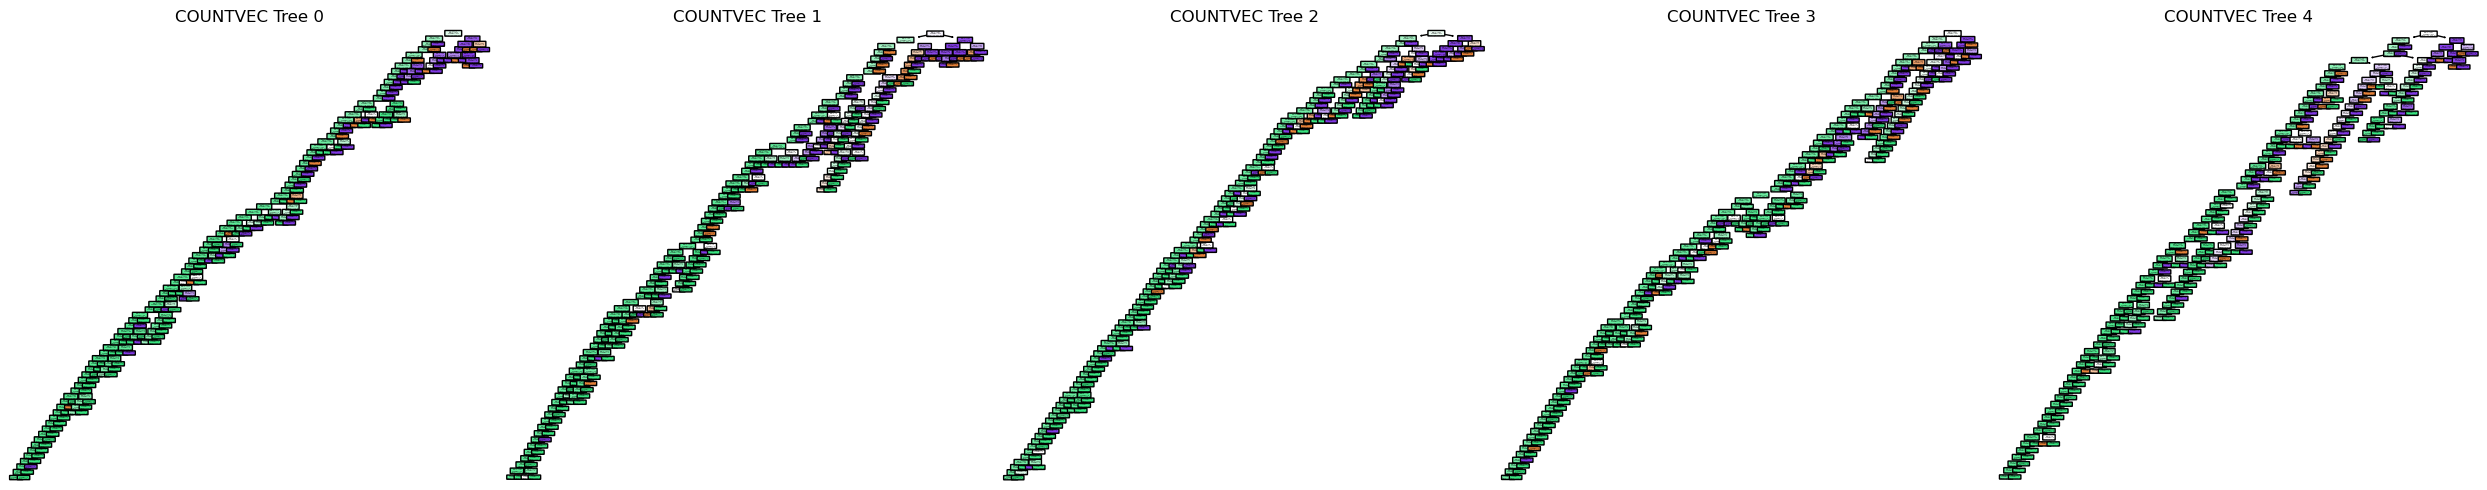

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))

for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    
    plot_tree(RFModel_countvec_lem.estimators_[i],
              filled=True,
              feature_names=feature_names_countvec,
              rounded=True,
              ax=ax)
    
    ax.set_title(f"COUNTVEC Tree {i}")

plt.tight_layout()

plt.show()

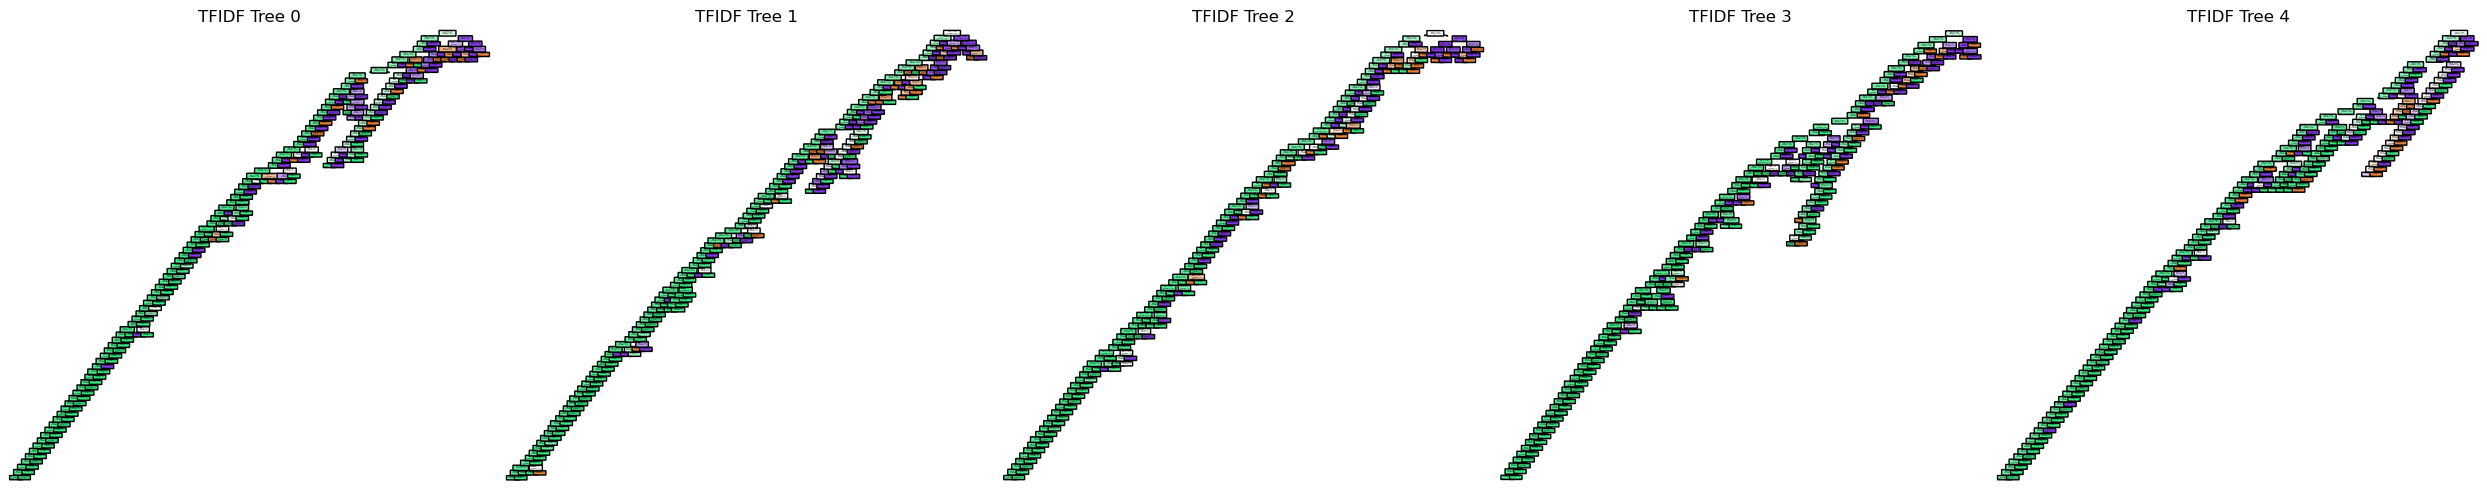

In [46]:
plt.figure(figsize=(25,5))

for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    
    plot_tree(RFModel_tfidf_lem.estimators_[i],
              filled=True,
              feature_names=feature_names_tfidf,
              rounded=True,
              ax=ax)
    
    ax.set_title(f"TFIDF Tree {i}")

plt.tight_layout()

plt.show()

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

kernels = ['linear', 'poly', 'rbf']
costs = [1,5,10,15,20]

results = []

for kernel in kernels:
    for cost in costs:
        model = SVC(kernel=kernel, C=cost, probability=True)
        model.fit(train_tfidf_lem, train_labels_tfidf_lem)
        predictions = model.predict(test_tfidf_lem)
        
        accuracy = accuracy_score(test_labels_tfidf_lem, predictions)
        cnf_matrix = confusion_matrix(test_labels_tfidf_lem, predictions)
        
        results.append({
            "Kernel": kernel,
            "Cost": cost,
            "Accuracy": accuracy,
            "Confusion Matrix": cnf_matrix
        })

results_df = pd.DataFrame(results)

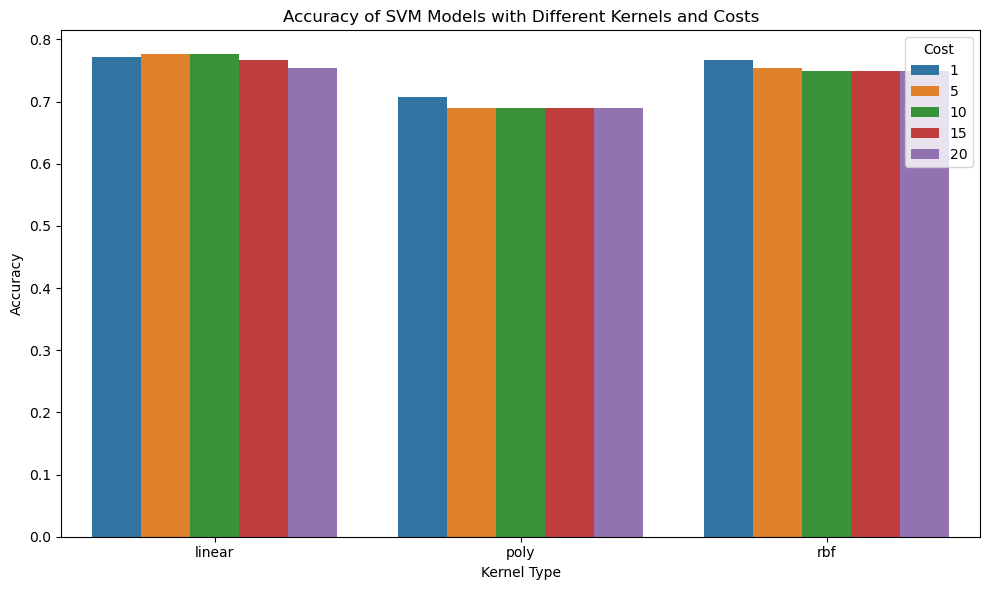

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Kernel", y="Accuracy", hue="Cost", data=results_df)
plt.title("Accuracy of SVM Models with Different Kernels and Costs")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.legend(title="Cost")
plt.tight_layout()
plt.show()

In [58]:
results_df[['Kernel', 'Cost', 'Accuracy']]

,Kernel,Cost,Accuracy
0,linear,1,0.771552
1,linear,5,0.775862
2,linear,10,0.775862
3,linear,15,0.767241
4,linear,20,0.754310
5,poly,1,0.706897
6,poly,5,0.689655
7,poly,10,0.689655
8,poly,15,0.689655
9,poly,20,0.689655


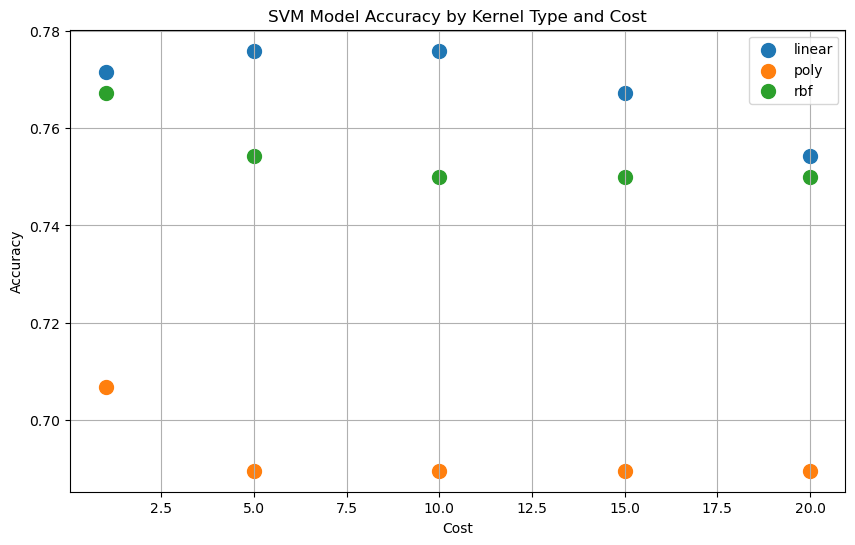

In [59]:
plt.figure(figsize=(10, 6))

for kernel in results_df['Kernel'].unique():

    subset = results_df[results_df['Kernel'] == kernel]

    plt.scatter(subset['Cost'], subset['Accuracy'], label=kernel, s=100)



plt.title('SVM Model Accuracy by Kernel Type and Cost')

plt.xlabel('Cost')

plt.ylabel('Accuracy')

plt.legend()

plt.grid(True)

plt.show()


The predictions from COUNTVEC with SVM Model are:
['neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'positive' 'positive' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'positive' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'positive'
 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'positive' 'positive' 'neutral' 'neutral' 'positive' 'neutral' 'positive'
 'n